# Data Preparation

## Dataset link: https://www.kaggle.com/datasets/mikhail1681/walmart-sales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
Dataset structure:
 None
Missing Values Before Cleaning:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64

Missing Values After Cleaning:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price

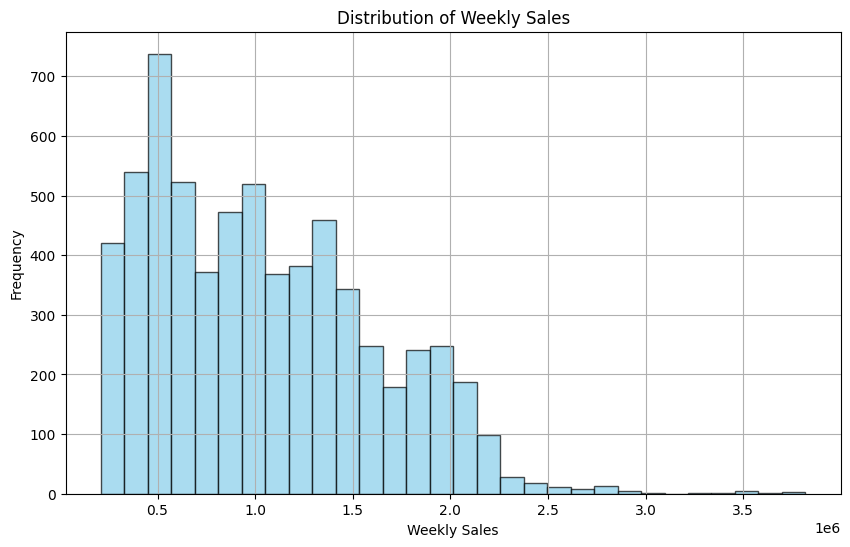

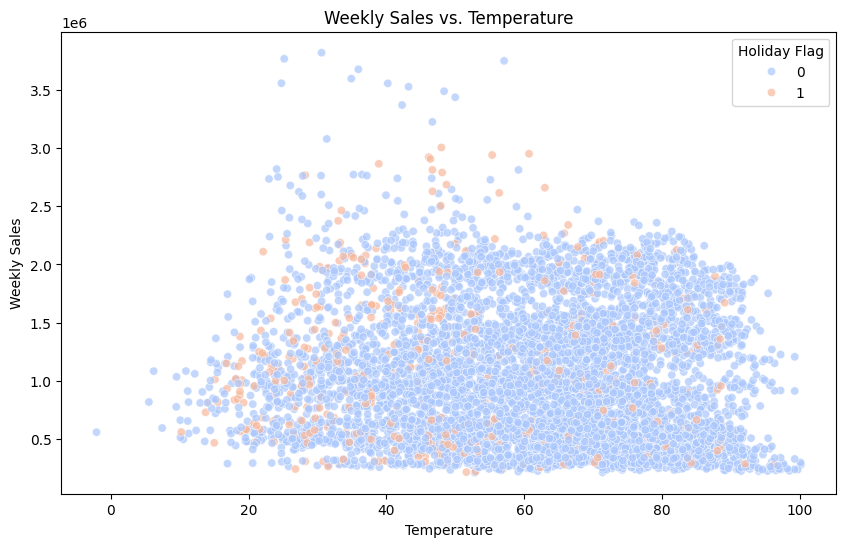

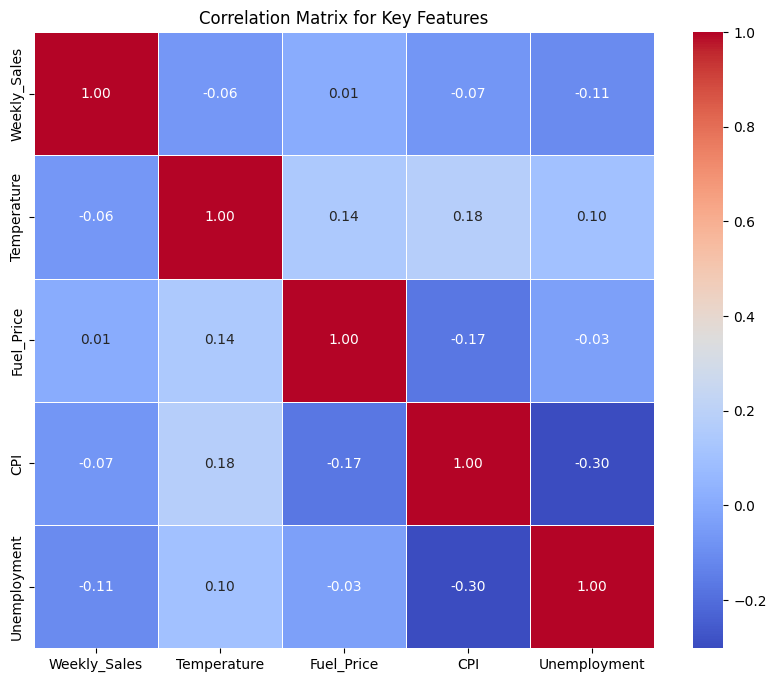

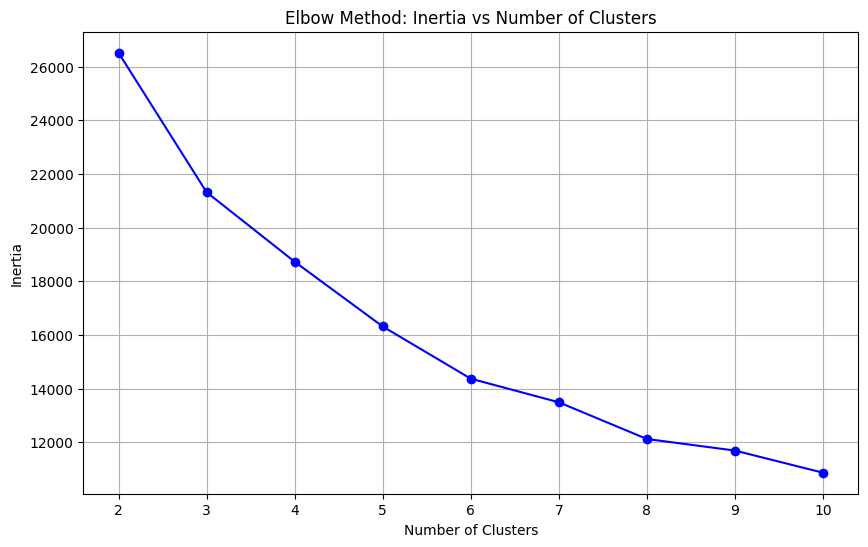

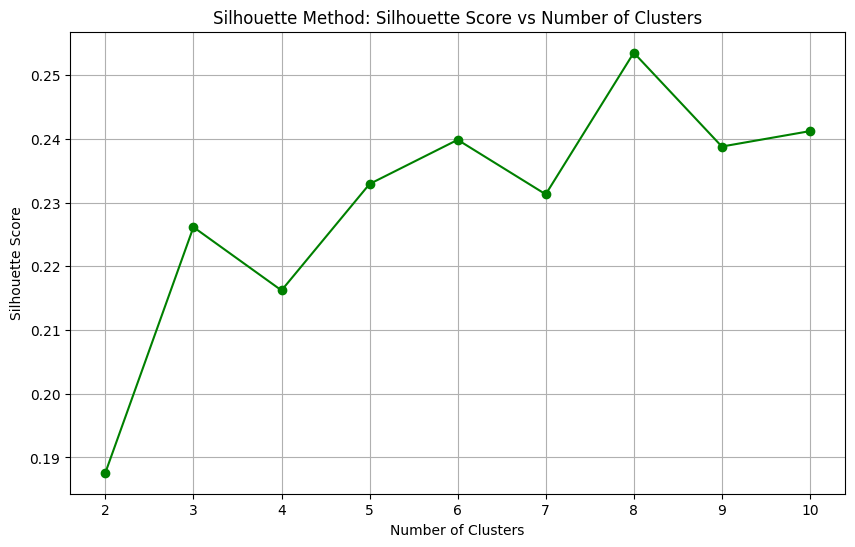

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")



# 1. Load Dataset
df = pd.read_csv('Walmart_Sales.csv')

# Dataset structure and info
print("Dataset structure:\n", df.info())

# 2. Convert Date Column to Datetime and Extract Features (Year, Month, Week)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Specify the correct format
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week  # Use isocalendar to get the week number

# 3. Show Missing Values Before and After Cleaning
print("Missing Values Before Cleaning:")
print(df.isnull().sum())

# Fill missing values with column means
df.fillna(df.mean(), inplace=True)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# 4. Dataset Summary After Cleaning
print("\nDataset Summary After Cleaning:")
print(df.describe())

# 5. Normalization for Clustering
scaler = StandardScaler()
features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df_scaled = scaler.fit_transform(df[features])

# 6. Exploratory Data Analysis (EDA)
## 6.1 Histogram for Weekly Sales Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Weekly_Sales'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 6.2 Scatter Plot for Weekly Sales vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperature'], y=df['Weekly_Sales'], hue=df['Holiday_Flag'], palette='coolwarm', alpha=0.7)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.legend(title='Holiday Flag')
plt.show()

## 6.3 Correlation Heatmap for Features like Sales, Temperature, Fuel Price, CPI, Unemployment
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Key Features')
plt.show()

# 7. K-means Clustering
## 7.1 Elbow Method to Find the Optimal Number of Clusters
inertia = []
silhouette_avg = []

for k in range(2, 11):  # Range of clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)

    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_avg.append(sil_score)

# 7.2 Elbow Plot (Inertia vs Number of Clusters)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o', color='blue', label='Inertia')
plt.title('Elbow Method: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 7.3 Silhouette Plot (Silhouette Score vs Number of Clusters)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_avg, marker='o', color='green', label='Silhouette Score')
plt.title('Silhouette Method: Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


# Clustering Analysis

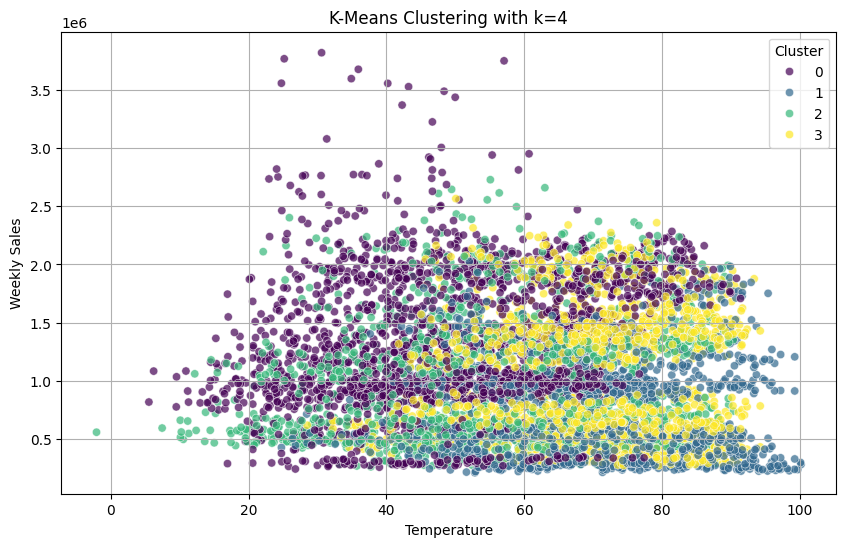

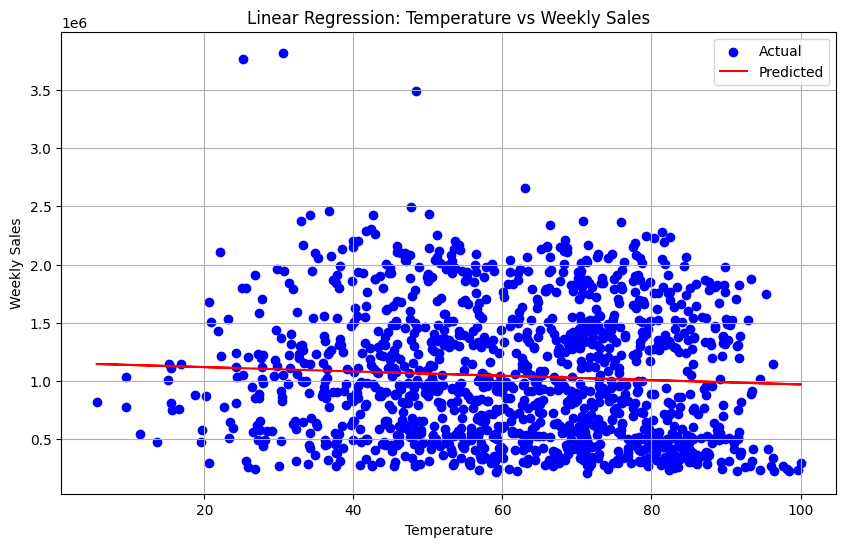

RMSE: 566140.54
R-squared: 0.01


In [6]:
# K-means Clustering
def kmeans_clustering(X, k=4):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    df['Cluster'] = kmeans.labels_

    # Plotting K-means Clustering Results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['Temperature'], y=df['Weekly_Sales'], hue=df['Cluster'], palette='viridis', alpha=0.7)
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('Temperature')
    plt.ylabel('Weekly Sales')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

# Apply K-means clustering
kmeans_clustering(df_scaled, k=4)

# 3. Linear Regression (Line Fitting)
def linear_regression(X, y):
    # Splitting data into training and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict values using the model
    y_pred = model.predict(X_test)

    # Plotting the Regression Line
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test['Temperature'], y_test, color='blue', label='Actual')  # Actual points
    plt.plot(X_test['Temperature'], y_pred, color='red', label='Predicted')  # Regression line
    plt.title('Linear Regression: Temperature vs Weekly Sales')
    plt.xlabel('Temperature')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")

# Perform linear regression on Weekly_Sales vs Temperature
linear_regression(df[['Temperature']], df['Weekly_Sales'])